<a href="https://colab.research.google.com/github/davidpastuszek/nn/blob/main/nn_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Aktivační fce

In [2]:
def sigmoid(z):
  return np.where(z<0, np.exp(z)/(1+np.exp(z)), 1/(1+np.exp(-z))) # je treba osetrit extremni hodnoty

def sigmoid_der(x):
  return np.vectorize(lambda y: y*(1-y))(x) # potrebuju pro kazdy prvek arraye (sigmoidu - derivace sigmoidu je sigm * (1- sigm ))

Ztrátová fce

In [3]:
def ztratova_fce(e):
  return sum(e**2)

def ztratova_der(e):
  return -1 * (2*e)

Neuronová síť

In [53]:
class sit:
    def __init__(self, x, y, p_neuronu, act_fce, der_act, loss_fce, der_loss):
        self.x = x
        self.y = y
        self.pn = p_neuronu
        self.ni = np.shape(x)[0]
        self.nj = np.shape(x)[1] # pocet radek na vstupu
        self.act_fce = act_fce
        self.der_act = der_act
        self.loss_fce = loss_fce
        self.der_loss = der_loss
        self.LR = 1
        # init vah:
        self.vahy1 = (np.random.rand(self.nj, self.pn)+0.5)/self.pn
        self.vahy2 = (np.random.rand(self.pn, 1)+0.5)/self.pn
        
        self.forward_prop()
        
    def forward_prop(self):
        self.LO1 = self.act_fce(np.matmul(self.x, self.vahy1))
        self.y_hat = self.act_fce(np.matmul(self.LO1, self.vahy2))
        self.e = self.y - self.y_hat
        
    def backward_prop(self):
            self.delta2 = np.matmul(np.transpose(self.LO1), (self.der_loss(self.e)*self.der_act(self.y_hat)))
            self.delta1 = np.matmul(np.transpose(self.x),
                                   np.matmul((self.der_loss(self.e) *  self.der_act(self.y_hat)),
                                            np.transpose(self.vahy2)) * self.der_act(self.LO1))
            self.vahy1 = self.vahy1 - self.delta1 * self.LR
            self.vahy2 = self.vahy2 - self.delta2 * self.LR
        
    def forecast(self, X_new):
        self.Lf = self.act_fce(np.matmul(X_new, self.vahy1))
        self.predict = self.act_fce(np.matmul(self.Lf, self.vahy2))
        return self.predict
    
    def train(self, n_epochs, LR):
        self.LR = LR
        self.n_epochs = n_epochs
        self.training = np.zeros(n_epochs)
        
        for i in range(self.n_epochs):
            self.backward_prop()
            self.forward_prop()
            #informace pro mě dal:
            self.training[i] = self.loss_fce(self.e)
            if i % 50 ==0:
              pass
              #print(f"{i}. iterace, ztrata: {self.training[i]:.2f}")

In [15]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0],[1],[1],[0]])

nase_sit = sit(X,Y, 2, sigmoid, sigmoid_der, ztratova_fce, ztratova_der)

In [46]:
nase_sit.train(1000, 0.1)

0. iterace, ztrata: 0.13
50. iterace, ztrata: 0.13
100. iterace, ztrata: 0.13
150. iterace, ztrata: 0.13
200. iterace, ztrata: 0.13
250. iterace, ztrata: 0.13
300. iterace, ztrata: 0.13
350. iterace, ztrata: 0.13
400. iterace, ztrata: 0.13
450. iterace, ztrata: 0.13
500. iterace, ztrata: 0.12
550. iterace, ztrata: 0.12
600. iterace, ztrata: 0.12
650. iterace, ztrata: 0.12
700. iterace, ztrata: 0.12
750. iterace, ztrata: 0.12
800. iterace, ztrata: 0.12
850. iterace, ztrata: 0.12
900. iterace, ztrata: 0.12
950. iterace, ztrata: 0.12


In [25]:
import pandas as pd
data = pd.read_csv("mtcars.csv", sep=";")

Y = np.array(data["mpg"])
X = np.array(data.loc[:,data.columns != "mpg"])

Y.resize([len(Y), 1])
Y.shape

Ys = np.apply_along_axis(lambda x: (x-min(x))/(max(x)-min(x)), 0, Y)
Xs = np.apply_along_axis(lambda x: (x-min(x))/(max(x)-min(x)), 0, X)

0. iterace, ztrata: 993.00
50. iterace, ztrata: 993.00
100. iterace, ztrata: 993.00
150. iterace, ztrata: 993.00
200. iterace, ztrata: 993.00
250. iterace, ztrata: 993.00
300. iterace, ztrata: 993.00
350. iterace, ztrata: 993.00
400. iterace, ztrata: 993.00
450. iterace, ztrata: 993.00
500. iterace, ztrata: 993.00
550. iterace, ztrata: 993.00
600. iterace, ztrata: 993.00
650. iterace, ztrata: 993.00
700. iterace, ztrata: 993.00
750. iterace, ztrata: 993.00
800. iterace, ztrata: 993.00
850. iterace, ztrata: 993.00
900. iterace, ztrata: 993.00
950. iterace, ztrata: 993.00


<ipython-input-45-2638f6ab6b10>:10: RuntimeWarning: divide by zero encountered in true_divide
  np.mean(np.abs(Y-fit)/Y)


inf

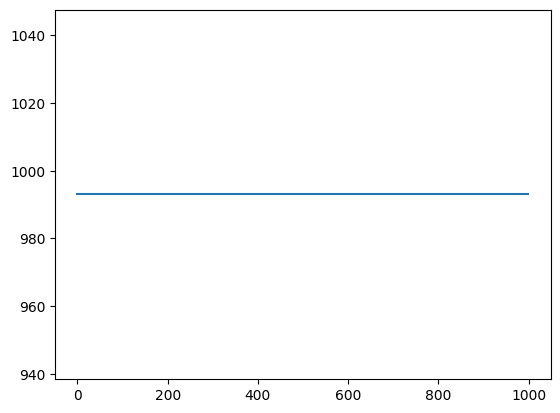

In [45]:
ymin = min(Y)
ymax = max(Y)

auta = sit(Xs, Ys, 6, sigmoid, sigmoid_der, ztratova_fce, ztratova_der)
auta.train(1000, 0.1)

plt.plot(auta.training)

fit = auta.y_hat*(ymax-ymin)+ymin
np.mean(np.abs(Y-fit)/Y)

Dating

In [28]:
data = pd.read_csv("dating.csv")

In [ ]:
from sklearn.model_selection import train_test_split

X = np.array(data.loc[:, data.columns != "match"])
Y = np.array(data["match"])

Y.resize([len(Y), 1])
Y.shape

Ys = np.apply_along_axis(lambda x: (x-min(x))/(max(x)-min(x)), 0, Y)
Xs = np.apply_along_axis(lambda x: (x-min(x))/(max(x)-min(x)), 0, X)

X_train, X_test, y_train, y_test = train_test_split(
    Xs, Ys, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=1)

dating = sit(X_train, y_train, 40, sigmoid, sigmoid_der, ztratova_fce, ztratova_der)
dating.train(1000, 0.01)

plt.plot(dating.training)

fit = dating.y_hat*(ymax-ymin)+ymin
np.mean(np.abs(y_train-fit)/y_train)


In [37]:
fit = dating.y_hat*(ymax-ymin)+ymin
np.mean(np.abs(y_train-fit)/y_train)

<ipython-input-37-739c852d64c5>:2: RuntimeWarning: divide by zero encountered in true_divide
  np.mean(np.abs(y_train-fit)/y_train)


inf

In [40]:
y_hat = [1 if i>=0.5 else 0 for i in dating.y_hat]

In [56]:
class minibatch:
  def __init__(self, x, y, p_neuronu, act_fce, der_act, loss_fce, der_loss, n_batch):
    self.x = x
    self.y = y
    self.pn = p_neuronu
    self.ni = np.shape(x)[0]
    self.nj = np.shape(x)[1]
    self.act_fce = act_fce
    self.der_act = der_act
    self.loss_fce = loss_fce
    self.der_loss = der_loss
    self.n_batch = n_batch
    self.data_id = np.array([np.random.choice(range(n_batch)) for i in range(self.ni)])

    self.site = []

    self.total_sit = sit(x, y, p_neuronu, act_fce, der_act, loss_fce, der_act)

    for i in range(n_batch):
      self.site.append(sit(x[self.data_id==i,:], y[self.data_id==i,:],
                           p_neuronu, act_fce, der_act, loss_fce, der_act))
      
  def mean_vahy(self):
    self.mean_vahy1 = np.zeros((self.nj, self.pn))
    self.mean_vahy2 = np.zeros((self.pn, 1))

    for i in range(self.n_batch):
      self.mean_vahy1 += (self.site[i].vahy1/self.n_batch)
      self.mean_vahy2 += (self.site[i].vahy2/self.n_batch)

  def pass_mean(self):
    for i in range(self.n_batch):
      self.site[i].vahy1 = self.mean_vahy1
      self.site[i].vahy2 = self.mean_vahy2
      self.site[i].forward_prop() # tímto dostanu sítě do bodu pro průměrný vektor w
    
    self.total_sit.vahy1 = self.mean_vahy1
    self.total_sit.vahy2 = self.mean_vahy2

    self.total_sit.forward_prop()

  def train(self, n_epochs, LR):
      self.LR = LR
      for j in range(n_epochs):
        for i in range(self.n_batch):
          self.site[i].train(1, LR)

        self.mean_vahy()
        self.pass_mean()

        self.training[j] = self.loss_fce(self.total_sit.e)

        if j % 100 == 0:
          print(f"{int(j)}.tá iterace, ztráta: {self.training[j]}")
      


In [68]:
from sklearn.model_selection import train_test_split

X = np.array(data.loc[:, data.columns != "match"])
Xs = np.apply_along_axis(lambda x: (x-min(x))/(max(x)-min(x)), 0, X)
y = np.array(data["match"])
y.resize([len(y), 1])

rande_mb = minibatch(Xs, y, 80, sigmoid, sigmoid_der, ztratova_fce, ztratova_der, 50)
rande_mb.train(1000, 0.1)

0.tá iterace, ztráta: [992.89324585]
100.tá iterace, ztráta: [992.93293494]
200.tá iterace, ztráta: [992.95125935]
300.tá iterace, ztráta: [992.96178728]
400.tá iterace, ztráta: [992.96861196]
500.tá iterace, ztráta: [992.97339046]
600.tá iterace, ztráta: [992.97692058]
700.tá iterace, ztráta: [992.97963356]
800.tá iterace, ztráta: [992.98178279]
900.tá iterace, ztráta: [992.98352686]


Tensor Flow, Keras, Pytorch

In [70]:
# ! - vykřičník značí přepnutí do příkazové řádky

import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd


In [107]:
data = pd.read_csv("dating.csv")
X = np.array(data.loc[:, data.columns != "match"])
y = np.array(data["match"])

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# standardizace pomocí průměru / směrodatné odchylky
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)

# použiju průměr a odchylku z training dat, v realitě testovací neznám
X_test_s = scaler.transform(X_test)

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(80, activation = "sigmoid", input_shape=(39,)))
# výstupní vrstva
model.add(tf.keras.layers.Dense(1, activation = "sigmoid"))

# kompilace modelu, tady se definuje optimizer
model.compile(optimizer = "adam", loss = "MeanSquaredError", metrics = "MeanAbsolutePercentageError")


In [110]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 80)                3200      
                                                                 
 dense_10 (Dense)            (None, 1)                 81        
                                                                 
Total params: 3,281
Trainable params: 3,281
Non-trainable params: 0
_________________________________________________________________


In [119]:
model.fit(X_train_s, y_train, epochs = 1000, batch_size = 32, verbose = 1)

Epoch 1/1000
50/50 [==============================] - 0s 6ms/step - loss: 0.0527 - mean_absolute_percentage_error: 59317476.0000
Epoch 2/1000
50/50 [==============================] - 0s 9ms/step - loss: 0.0525 - mean_absolute_percentage_error: 60994536.0000
Epoch 3/1000
50/50 [==============================] - 0s 8ms/step - loss: 0.0521 - mean_absolute_percentage_error: 60483972.0000
Epoch 4/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.0518 - mean_absolute_percentage_error: 59552600.0000
Epoch 5/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.0514 - mean_absolute_percentage_error: 59413088.0000
Epoch 6/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.0508 - mean_absolute_percentage_error: 59571300.0000
Epoch 7/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.0507 - mean_absolute_percentage_error: 57927356.0000
Epoch 8/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.0501 - mean_absolute_

In [120]:
model.evaluate(X_test_s, y_test, verbose = 1)

13/13 [==============================] - 0s 2ms/step - loss: 0.1094 - mean_absolute_percentage_error: 72200456.0000


[0.10943115502595901, 72200456.0]

In [121]:
yhat = np.round(model.predict(X_test_s))
sum([i == int(j) for i,j in zip(y, yhat) ])/len(y)

13/13 [==============================] - 0s 2ms/step


In [124]:
data = pd.read_csv("dating.csv")
X = np.array(data.loc[:, data.columns != "match"])
y = np.array(data["match"])

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# standardizace pomocí průměru / směrodatné odchylky
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)

# použiju průměr a odchylku z training dat, v realitě testovací neznám
X_test_s = scaler.transform(X_test)

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(80, activation = "sigmoid", input_shape=(39,)))

model.add(tf.keras.layers.Dropout(.2, input_shape=(80,)))
# výstupní vrstva
model.add(tf.keras.layers.Dense(1, activation = "sigmoid"))

# kompilace modelu, tady se definuje optimizer
model.compile(optimizer = "adam", loss = "MeanSquaredError", metrics = "MeanAbsolutePercentageError")

model.summary()

model.fit(X_train_s, y_train, epochs = 1000, batch_size = 32, verbose = 1)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 80)                3200      
                                                                 
 dropout_1 (Dropout)         (None, 80)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 81        
                                                                 
Total params: 3,281
Trainable params: 3,281
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
50/50 [==============================] - 3s 5ms/step - loss: 0.2036 - mean_absolute_percentage_error: 195592240.0000
Epoch 2/1000
50/50 [==============================] - 0s 6ms/step - loss: 0.1616 - mean_absolute_percentage_error: 179385616.0000
Epoch 3/1000
50/50 [==============================] - 0s

In [125]:
data = pd.read_csv("dating.csv")
X = np.array(data.loc[:, data.columns != "match"])
y = np.array(data["match"])

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# standardizace pomocí průměru / směrodatné odchylky
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)

# použiju průměr a odchylku z training dat, v realitě testovací neznám
X_test_s = scaler.transform(X_test)

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(80, activation = "sigmoid", input_shape=(39,)))

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(80, activation = "sigmoid", input_shape=(39,)))

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(80, activation = "sigmoid", input_shape=(39,)))

model.add(tf.keras.layers.Dropout(0.2))
# výstupní vrstva
model.add(tf.keras.layers.Dense(1, activation = "sigmoid"))

# kompilace modelu, tady se definuje optimizer
model.compile(optimizer = "adam", loss = "MeanSquaredError", metrics = "MeanAbsolutePercentageError")

model.summary()

model.fit(X_train_s, y_train, epochs = 100, batch_size = 32, verbose = 1)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 80)                3200      
                                                                 
 dropout_2 (Dropout)         (None, 80)                0         
                                                                 
 dense_16 (Dense)            (None, 80)                6480      
                                                                 
 dropout_3 (Dropout)         (None, 80)                0         
                                                                 
 dense_17 (Dense)            (None, 80)                6480      
                                                                 
 dropout_4 (Dropout)         (None, 80)                0         
                                                                 
 dense_18 (Dense)            (None, 1)                

In [127]:
yhat = np.round(model.predict(X_test_s))
sum([i == int(j) for i,j in zip(y_test, yhat) ])/len(y_test)

13/13 [==============================] - 0s 2ms/step


0.8919597989949749

In [132]:
# přetrénované sítě

data = pd.read_csv("dating.csv")
X = np.array(data.loc[:, data.columns != "match"])
y = np.array(data["match"])

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# standardizace pomocí průměru / směrodatné odchylky
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)

# použiju průměr a odchylku z training dat, v realitě testovací neznám
X_test_s = scaler.transform(X_test)

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(80, activation = "sigmoid", input_shape=(39,)))

#model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(80, activation = "sigmoid", input_shape=(39,)))

#model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(80, activation = "sigmoid", input_shape=(39,)))

#model.add(tf.keras.layers.Dropout(0.2))
# výstupní vrstva
model.add(tf.keras.layers.Dense(1, activation = "sigmoid"))

# kompilace modelu, tady se definuje optimizer
model.compile(optimizer = "adam", loss = "MeanSquaredError", metrics = "MeanAbsolutePercentageError")

model.summary()

history = model.fit(X_train_s, y_train, epochs = 100, batch_size = 32, verbose = 1)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 80)                3200      
                                                                 
 dense_24 (Dense)            (None, 80)                6480      
                                                                 
 dense_25 (Dense)            (None, 80)                6480      
                                                                 
 dense_26 (Dense)            (None, 1)                 81        
                                                                 
Total params: 16,241
Trainable params: 16,241
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
50/50 [==============================] - 3s 5ms/step - loss: 0.2562 - mean_absolute_percentage_error: 263803008.0000
Epoch 2/100
50/50 [==============================] - 

In [134]:
yhat = np.round(model.predict(X_test_s))
sum([i == int(j) for i,j in zip(y_test, yhat) ])/len(y_test)

13/13 [==============================] - 0s 2ms/step


0.8819095477386935

TypeError: ignored

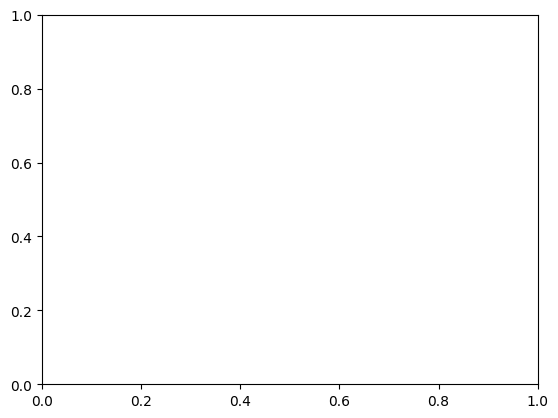

In [135]:
import matplotlib.pyplot as plt
plt.plot(history.history)